In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
tf.__version__

'2.19.0'

# 신경망과 첫 만남

### 패션 MNIST 이미지를 10개 범주로 분류

## 데이터 준비

In [3]:
# 케라스에서 Fashion MNIST 데이터셋 적재
from keras.datasets import fashion_mnist

In [4]:
(train_input, train_target),(test_input, test_target) = fashion_mnist.load_data()

In [5]:
train_input.shape

(60000, 28, 28)

In [6]:
type(train_input)

numpy.ndarray

In [7]:
train_target

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_target

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

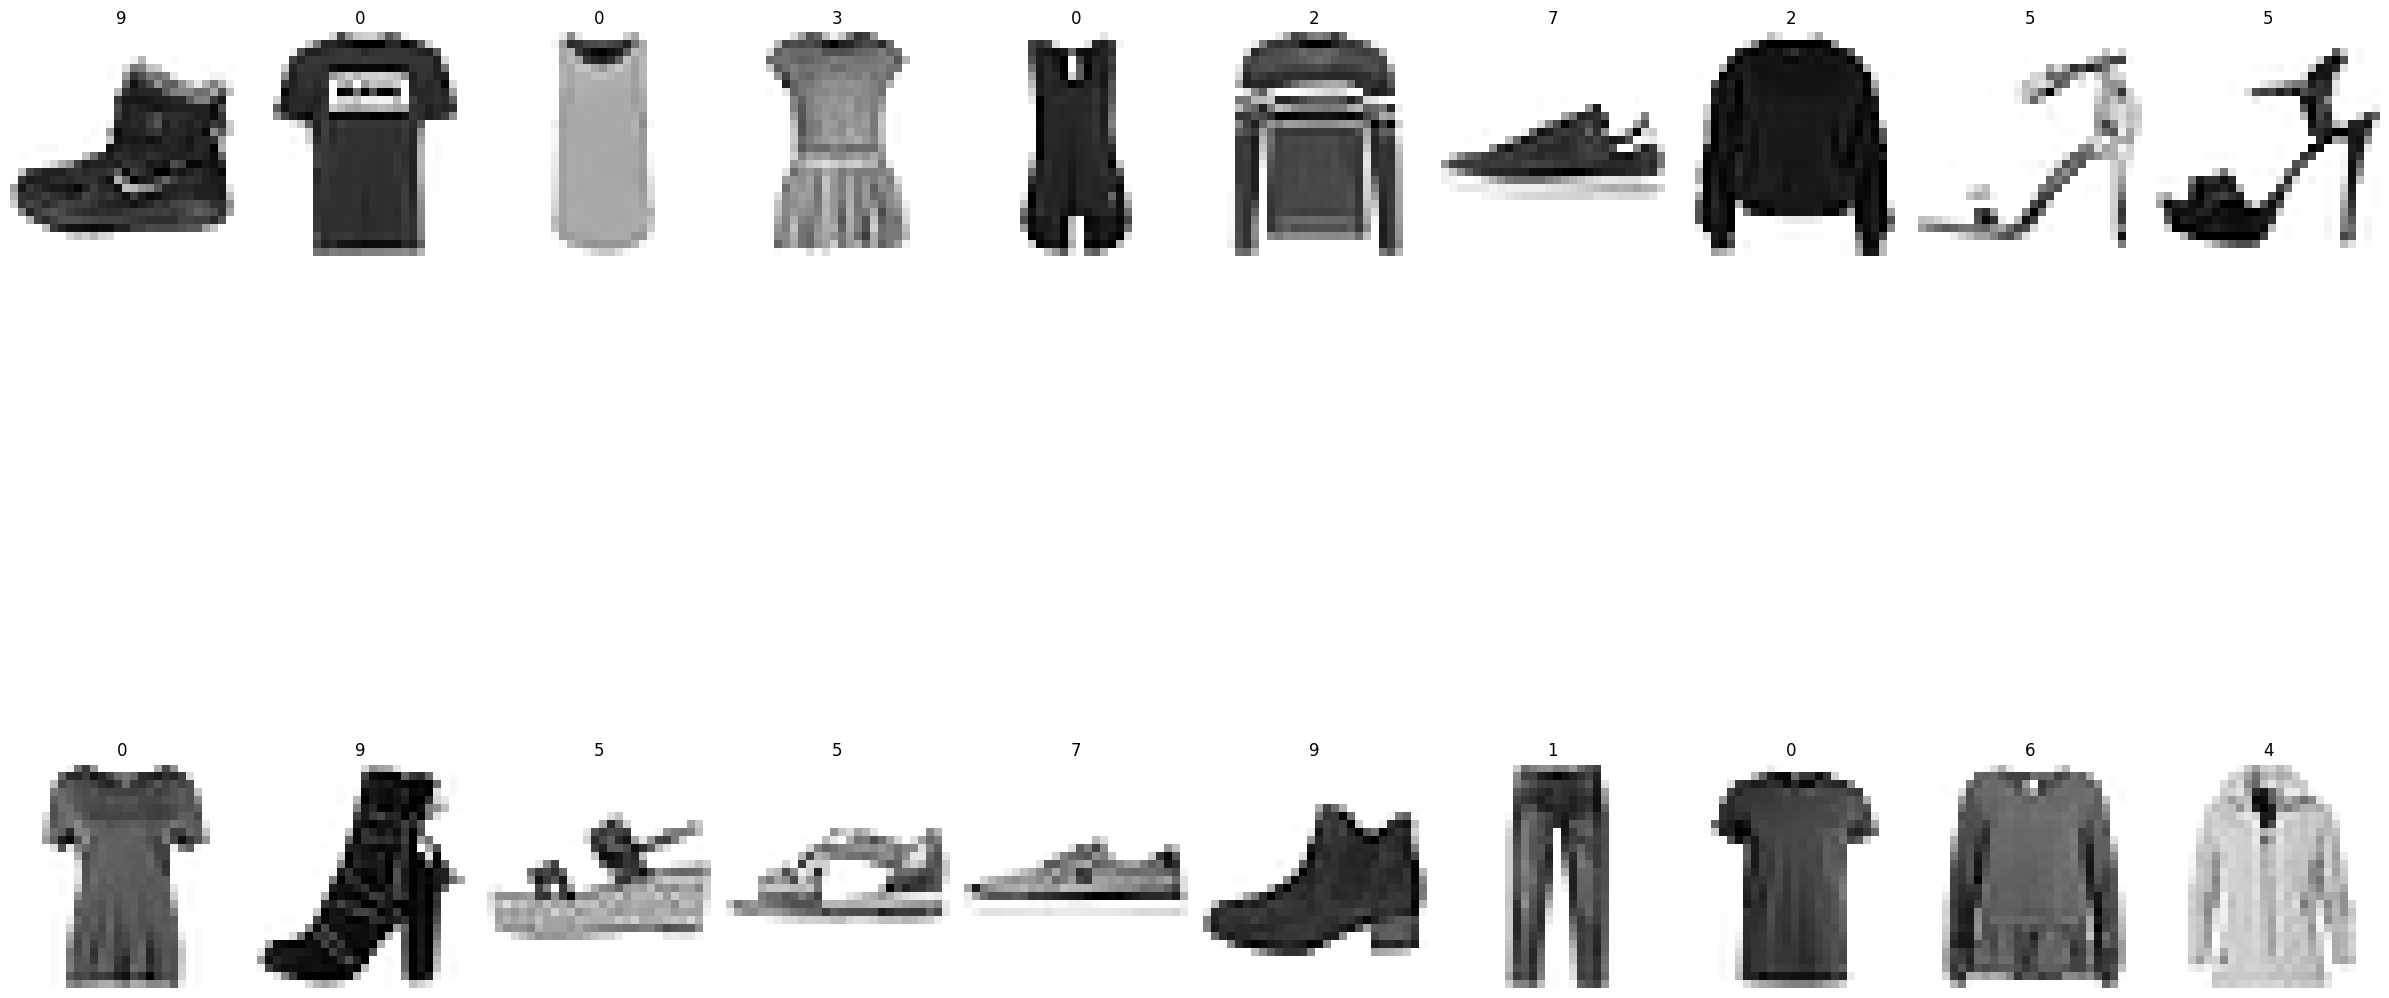

In [9]:
fig, axs = plt.subplots(figsize=(24,20), nrows=2, ncols=10 )
for i in range(20):
    r, c = i//10, i%10
    axs[r][c].imshow(train_input[i], cmap=plt.cm.binary)
    axs[r][c].axis('off')
    axs[r][c].set_title(train_target[i])
plt.tight_layout()
plt.show()

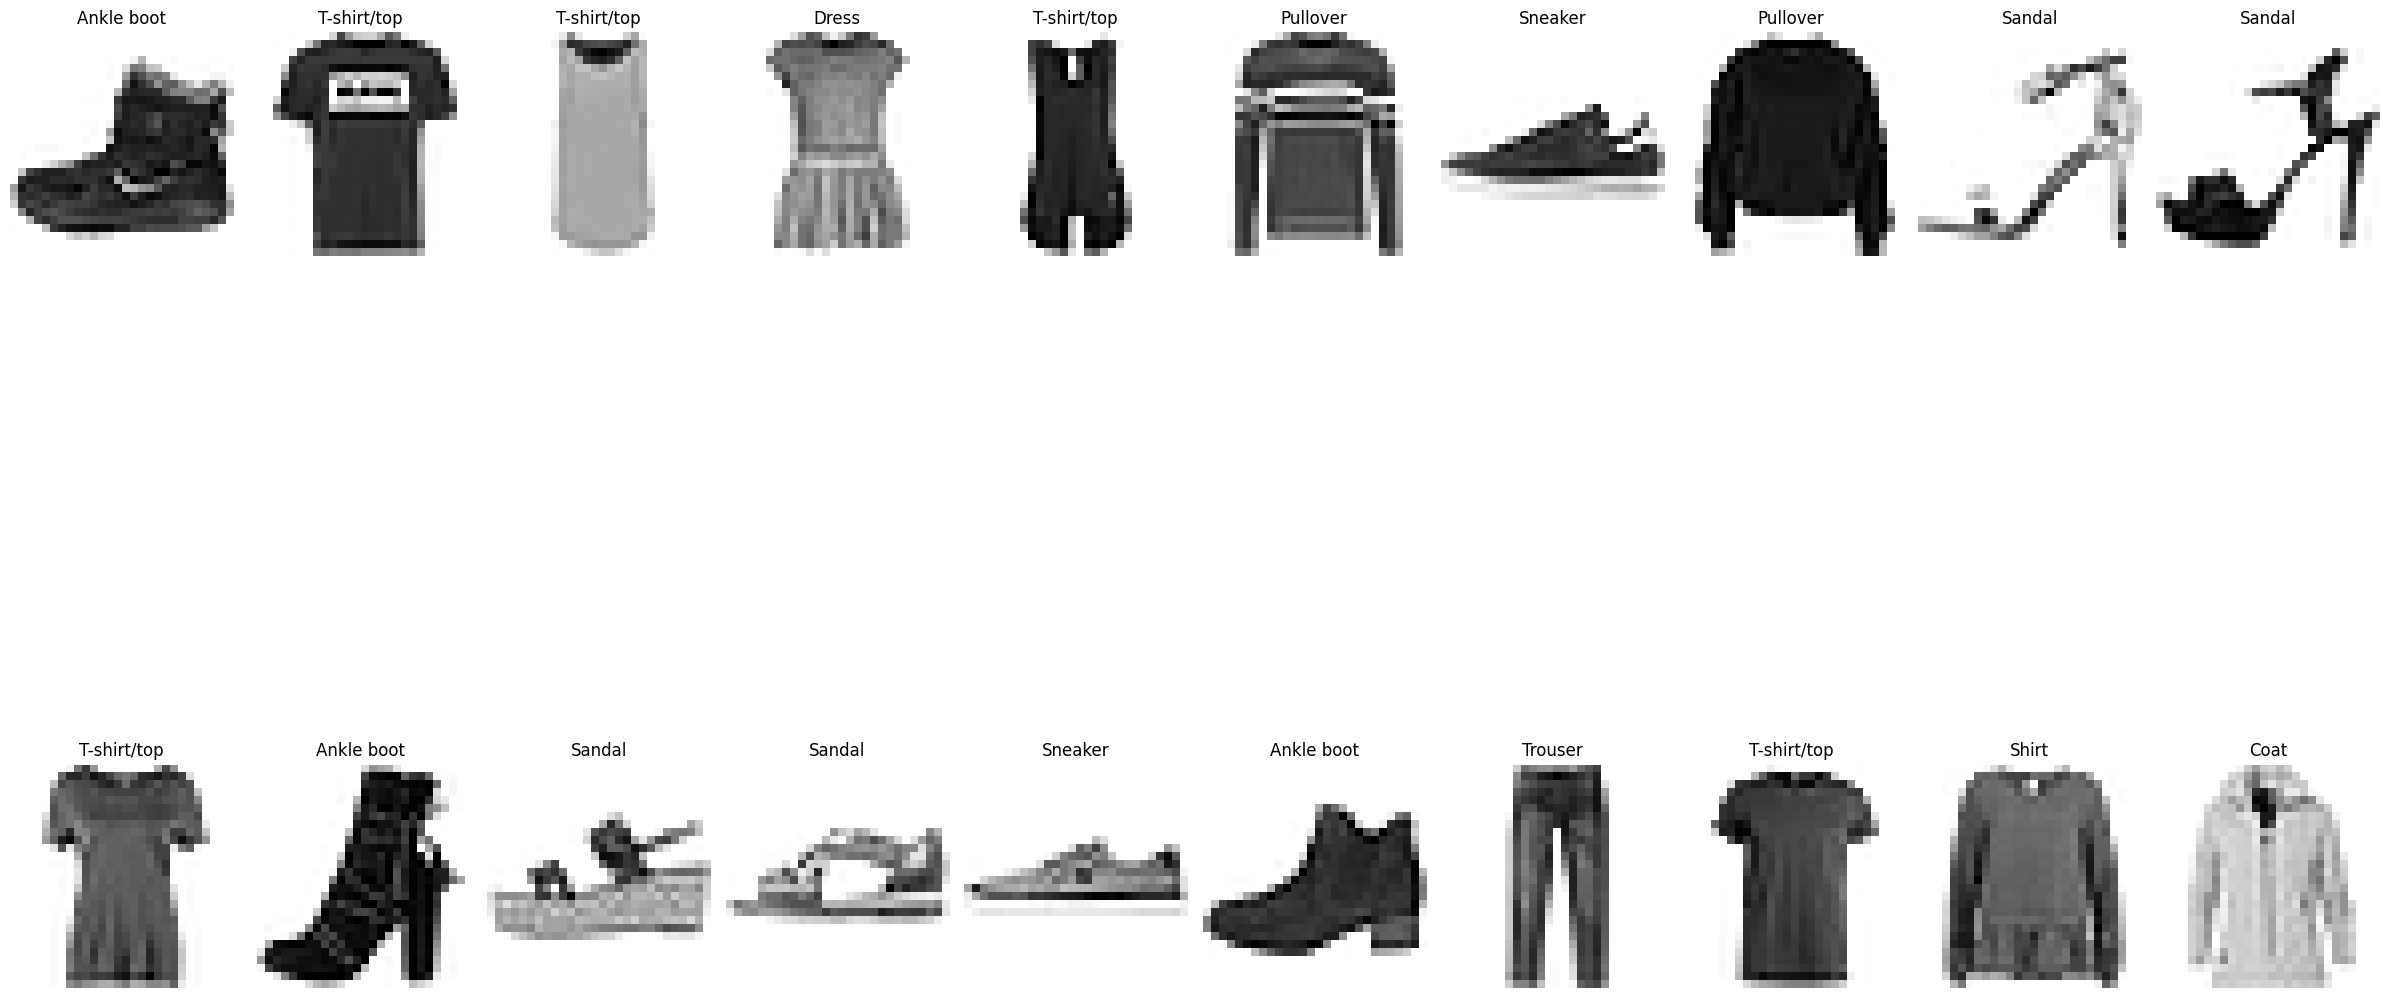

In [10]:
target_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
fig, axs = plt.subplots(figsize=(24,20), nrows=2, ncols=10 )
for i in range(20):
    r, c = i//10, i%10
    axs[r][c].imshow(train_input[i], cmap=plt.cm.binary)
    axs[r][c].axis('off')
    axs[r][c].set_title(target_names[train_target[i]])
plt.tight_layout()
plt.show()

In [11]:
np.unique(train_target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [12]:
np.unique(test_target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

**네트워크에 맞는 이미지 데이터로 준비**

훈련 데이터와 평가데이터

- [0,255] 사이의 값인 unit8 타입의 (60000, 28, 28)크기를 가진 배열을 0과 1사이의 값을 가지는 float32 타입의 (60000, 28 * 28) 크기 배열로 변환

In [13]:
train_input[0].min(), train_input[0].max()

(np.uint8(0), np.uint8(255))

- 타깃 레이블 범주형으로 인코딩

In [14]:
train_X = train_input.reshape((60000, 28*28))
train_X  = train_X.astype('float32')/255
train_X[0].min(), train_X[0].max()

(np.float32(0.0), np.float32(1.0))

In [15]:
test_X = test_input.reshape((10000, 28*28))
test_X = test_X.astype('float32')/255

In [16]:
from keras.utils import to_categorical

train_y = to_categorical(train_target)
test_y = to_categorical(test_target)

In [17]:
train_target[0]

np.uint8(9)

In [18]:
train_y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

## 모델 설계 및 실행

### 1) 신경망 모델 정의

In [28]:
from keras import models, layers, Input

In [29]:
nn = models.Sequential([
    Input(shape=(28*28,)),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')    
])


In [30]:
nn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

**신경망 구조**
- 입력층, 은닉층, 출력층

In [31]:
#!pip install graphviz

In [32]:
#!pip install pydot

In [33]:
from keras.utils import plot_model

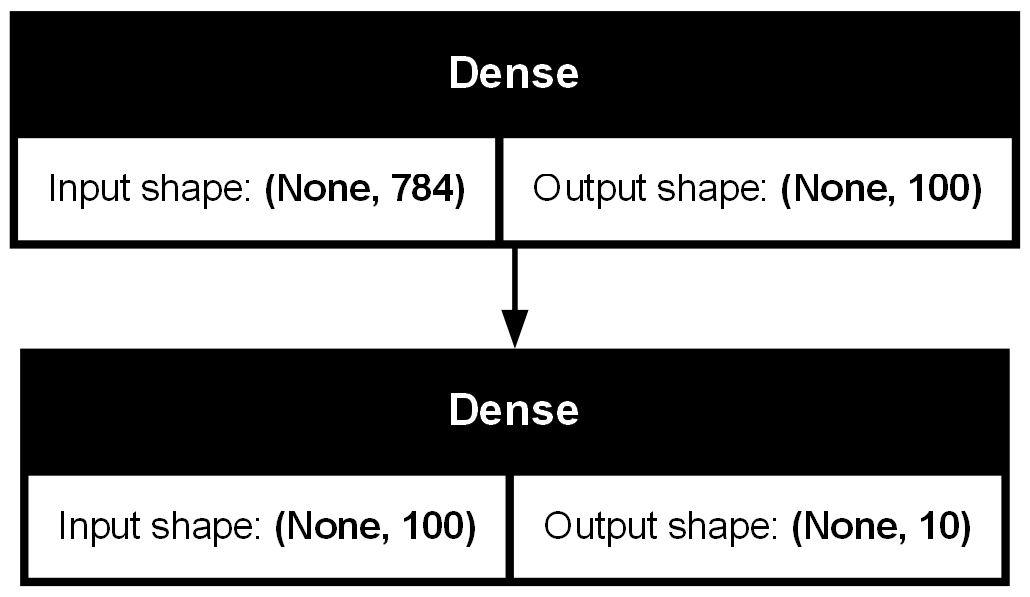

In [34]:
plot_model(nn,to_file='model.png', show_shapes=True)

### 2) 모델 컴파일

지정한 모델이 효과적으로 구현될 수 있게 여러 가지 환경을 설정해 주면서 컴파일하는 부분

In [35]:
nn.compile(optimizer='adam',
           loss='categorical_crossentropy',
           metrics=['accuracy'])

- optimizer='SGD', 'RMSprop', 'Agagrad', 'Adam'
- loss
    - 다중분류: 'categorical_crossentropy'
    - 이진분류: 'binary_crossentropy'
    - 정수레이블을 갖는 경우 다중분류: 'sparse_categorical_crossentropy'
    - 회귀모델: 'mean_square_error'
- metrics
    - 다중분류 : 'accuracy','sparse_categorical_accuracy', 'precision','recall'
    - 원핫라벨 :  'categorical_accuracy'
    - 이진분류 : 'binary_accuracy', 'AUC','precision','recall'
    - 회귀모델 : 'mse', 'mae', 'mape', 'RMSE'

### 3) 모델 실행(훈련)

In [36]:
nn.fit(train_X, train_y, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8101 - loss: 0.5527
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8570 - loss: 0.4065
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8695 - loss: 0.3686
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8763 - loss: 0.3454
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8837 - loss: 0.3230


### 4) 모델 예측(평가)

네트워크의 손실과 정확도 확인

In [37]:
60000/128

468.75

In [38]:
test_loss, test_acc = nn.evaluate(test_X, test_y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8745 - loss: 0.3578


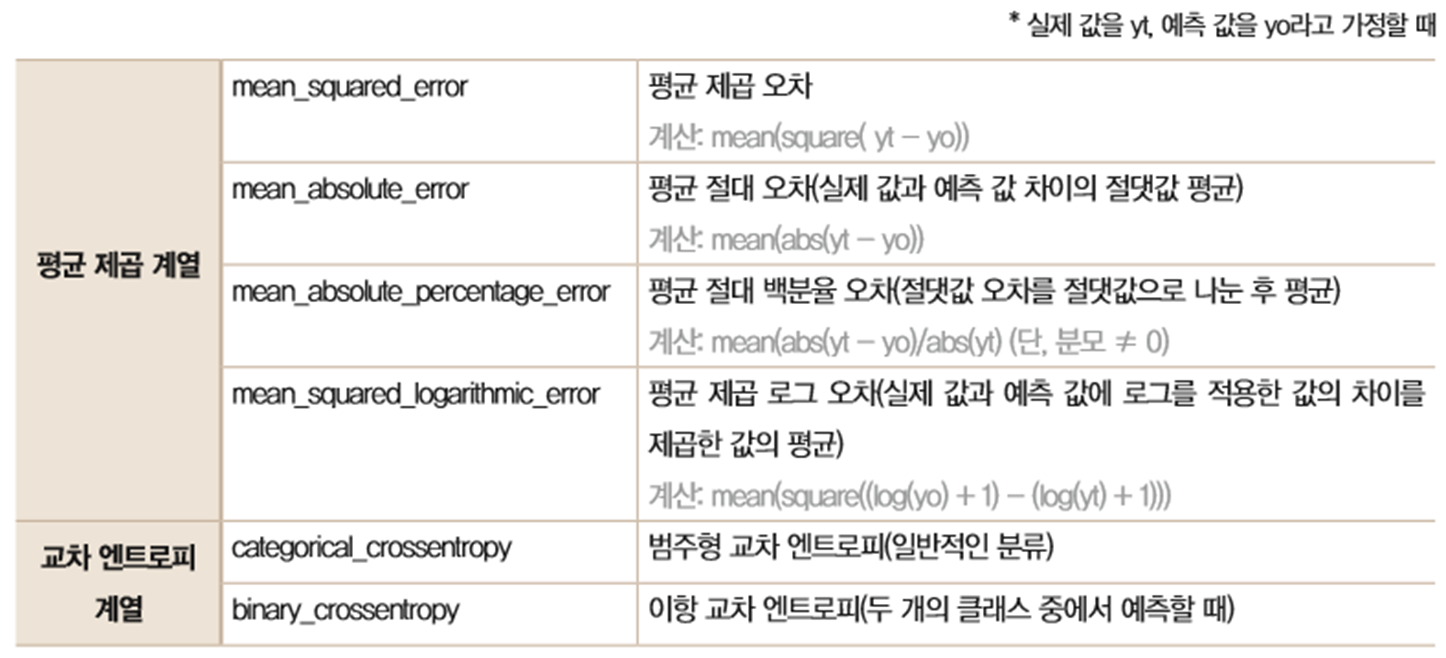

활성화함수
- sigmoid : 이진분류의 출력층의 활성화함수 많이 사용
- softmax : 다중분류의 출력층의 활성화함수 사용
- relu, sigmoid, tanh : 은닉층에서 사용하는 활성화 함수

모델 생성(build) - 모델 컴파일(compile:손실, 옵티마이저, 성능지표) - 모델 훈련(fit) - 모델 성능 평가(fit/evaluate) - 일반화(추론 predict)

### 확인문제

1. 어떤 인공 신경망이 입력특성이 100개 이고 밀집층에 있는 뉴런 개수가 10개일 때 필요한 모델 파라미터 개수는 몇개인가요? 1010개

2. 케라스이 Dense 클래스를 사용해 신경망의 출력층을 만들려고 한다. 이 신경망이 이진 분류 모델이라면 activation 매개변수에 어떤 활성화 함수를 지정해야 하는가?
시그모이드

3. 케라스 모델에서 손실 함수와 측정 지표 등을 지정하는 메서드는 무엇인가?              
compile

4. 정수 레이블을 타깃으로 가지는 다중 분류 문제일 때, 케라스 모델의 compile() 메서드에 지정할 손실함수로 적절한 것은 무엇인가?              
sparse_categorical_crossentropy

5. 크기가 $300*300$인 입력을 케라스 층으로 펼치려고 한다. 어떤 층을 사용해야 하는가?                        
   Flatten()층

6. 이미지 분류를 위한 심층신경망에서 널리 사용되는 케라스의 활성화 함수는 무엇인가?  2                              
    ① linear       
    ② sigmoid      
    ③ relu     
    ④ tanh

#### 8. 다음 중 적응적 합습률을 사용하지 않는 옵티마이저는 무엇인가?  1
    ① SGD        
    ② Adagrad       
    ③ RMSprop       
    ④ Adam 